# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-11-06 10:35:41--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.02s   

2023-11-06 10:35:41 (3.48 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,208,86,46,70,149,65,8,149,45,19,146,170,331,185,77,6,6,183,188
1,596,90,40,83,178,61,8,178,37,21,132,199,472,157,71,1,14,187,193
2,164,98,54,104,186,59,10,213,32,24,172,223,665,217,73,1,26,186,195
3,116,100,45,100,209,65,8,201,32,23,147,231,611,189,72,5,5,189,195
4,184,103,46,106,209,66,10,203,33,23,149,217,612,210,70,9,10,191,199
5,412,80,43,71,133,60,7,150,45,19,146,170,330,176,81,6,15,180,184
6,642,95,46,104,208,66,9,191,35,22,148,210,543,169,68,0,28,190,200
7,606,84,37,70,150,61,7,137,49,18,140,156,278,121,64,0,23,196,205
8,402,101,52,105,162,53,10,212,31,24,163,226,669,204,74,12,11,186,194
9,387,90,47,85,145,58,9,152,44,19,155,175,345,184,73,4,2,186,197


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Данные в датасете не отнормированы (имеют среднее отличное от 0 и СКО отличное от 1), для эффекитвности работы алгоритмов классификации проведу стандартизацию данный с помощью StandardScaler

In [13]:
### YOUR CODE HERE
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)


In [6]:
X_train_scaled

array([[-0.84389489, -0.96471921,  0.18610351, ..., -0.73836375,
        -1.00201054, -1.07565884],
       [ 0.72081158, -0.46400463, -0.78387268, ...,  0.14477721,
        -0.34693012, -0.39058146],
       [-1.02133583,  0.53742453,  1.47940509, ...,  1.46948864,
        -0.51070022, -0.11655051],
       ...,
       [-0.97294284, -1.2150765 , -0.94553538, ...,  2.79420007,
         0.1443802 ,  0.29449592],
       [-0.83582939,  0.03670995, -0.94553538, ...,  1.13831078,
         1.94585138,  1.80166616],
       [-0.94874635, -0.33882599, -0.46054728, ..., -1.40071947,
         1.94585138,  1.52763521]])

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE
set(y_train)
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l1', 'l2', 'elasticnet', None), 'C':[1, 10], 'class_weight': (None, 'balanced')}
LR = LogisticRegression(random_state=0, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
clf = GridSearchCV(LR, parameters)
clf.fit(X_train_scaled, y_train)
clf.best_estimator_

Выполнила поиск по сетке GridSearchCV, чтобы определеить оптимальный набор параметров для логистичекой регрессии. Поиск выполнялся для тех параметров, которые не были зафиксированы в задании. Результат :C=10, class_weight='balanced', max_iter=500,
                   multi_class='multinomial', random_state=0, solver='saga',
                   tol=0.001

Посчитаем метрики для логистической регрессии

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

y_pred = clf.best_estimator_.predict(X_test_scaled)
y_prob = clf.best_estimator_.predict_proba(X_test_scaled)

tags_unique = set(y_train)

print('Accuracy of LR is {0}'.format(accuracy_score(list(y_test), list(y_pred))))
print('Recall of LR is {0}'.format(recall_score(list(y_test), list(y_pred), labels=list(tags_unique), average = None).mean()))
print('Precision of LR is {0}'.format(precision_score(list(y_test), list(y_pred), labels=list(tags_unique), average = None).mean()))
print('F1_score of LR is {0}'.format(f1_score(list(y_test), list(y_pred), labels=list(tags_unique), average = None).mean()))

Accuracy of LR is 0.7811447811447811
Recall of LR is 0.7928124999999999
Precision of LR is 0.7876992232078016
F1_score of LR is 0.78868271316188


Построим график ROC чтобы оценить качество модели LR

Посмотрим на качество классифкации по 4 классам отдельно:

In [16]:
f1_score(list(y_test), list(y_pred), labels=list(tags_unique), average = None)

array([0.96875   , 0.60810811, 0.64197531, 0.93589744])

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

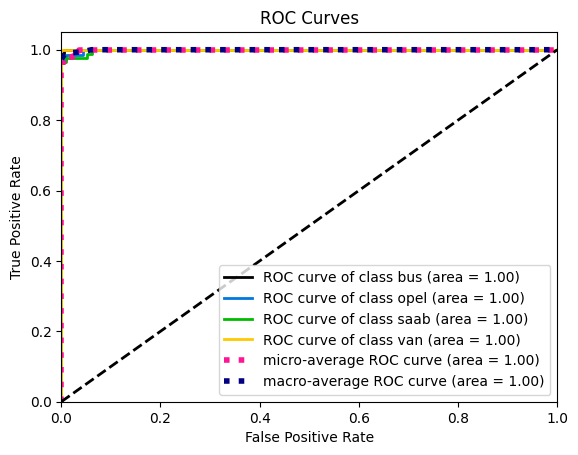

In [15]:
! pip install scikit-plot
import scikitplot
scikitplot.metrics.plot_roc(y_pred, y_prob)

In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead



Видим, что модель имеет высокие TP при малых FP - то есть площадь под ROC кривой близка к 1. Это значит, модель LR хорошо справляется с классификацией в данной задаче. При этом на f1 для каждого класса мы видим, что с 1 и 4 классом модель справляется лучше, чем со 2 и 3.

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

Попробуем сократить количество признаков (изначально в датасете их 19) так, чтобы сохранить большую часть информации в данных. Для этого построю график куммулятивной объясненной дисперсии (explaided variance). Точка, где возрастание кривой становится пологим, подскажет нам число кол-во собственных значений, которые надо отсавить, остальные отсечь.

Объясненная дисперсия:  [6.32830165e-01 3.50995582e-01 7.10066117e-03 4.81716284e-03
 1.60767972e-03 7.54372773e-04 5.23430157e-04 4.53802458e-04
 3.05185220e-04 2.23998016e-04 1.21064074e-04 1.01917335e-04
 6.06769607e-05 4.95804559e-05 2.72317008e-05 1.72225223e-05
 7.07810851e-06 2.45849890e-06 7.31124194e-07]
Собственные значения:  [5813.97597886 4329.92597371  615.85580796  507.25380159  293.04169241
  200.73479069  167.2087564   155.69084241  127.67662533  109.38347909
   80.41504113   73.78255245   56.9300488    51.46179197   38.13880054
   30.33039209   19.4441183    11.45947327    6.24921152]
Накопленная объясненная дисперсия:  [0.63283017 0.98382575 0.99092641 0.99574357 0.99735125 0.99810562
 0.99862905 0.99908286 0.99938804 0.99961204 0.9997331  0.99983502
 0.9998957  0.99994528 0.99997251 0.99998973 0.99999681 0.99999927
 1.        ]


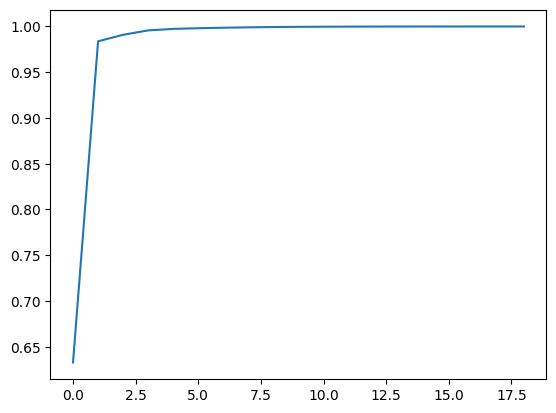

In [19]:
### YOUR CODE HERE
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
pca = PCA(n_components=19)
pca.fit(X_train)
PCA(n_components=19)
print('Объясненная дисперсия: ', pca.explained_variance_ratio_)
print('Собственные значения: ', pca.singular_values_)
cum_exp_variance = np.cumsum(pca.explained_variance_ratio_)

print('Накопленная объясненная дисперсия: ', cum_exp_variance)
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [20]:
### YOUR CODE HERE
PCa = PCA(n_components = 3)

X_train_PCA = PCa.fit_transform(X_train)
X_test_PCA = PCa.transform(X_test)

explained_variance = PCa.explained_variance_ratio_
explained_variance


array([0.63283017, 0.35099558, 0.00710066])

По результатам оценки объясненной дисперсии с помощью метода PCA выберем 3 признака из 19, которые обеспечивают 99% информации, остальные 16 в сумме дают 1%

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Отнормируем 3 признака (вычитаем среднее, делим на СКО), задам параметры для логистической регрессии оптимальными с предыдущего шага и обучу логистическую регрессию на сжатых данных

In [22]:
### YOUR CODE HERE
LR = LogisticRegression(C=10, class_weight='balanced', max_iter=500,
                   multi_class='multinomial', random_state=0, solver='saga',
                   tol=0.001)

scaler_PCA = preprocessing.StandardScaler().fit(X_train_PCA)
X_train_PCA_scaled = scaler_PCA.transform(X_train_PCA)
X_test_PCA_scaled =scaler_PCA.transform(X_test_PCA)
clf_PCA = LR.fit(X_train_PCA_scaled, y_train)


Accuracy is 0.4006734006734007
Recall is 0.41473557692307694
Precision is 0.40347996761339855
F1_score is 0.3930320148229899


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

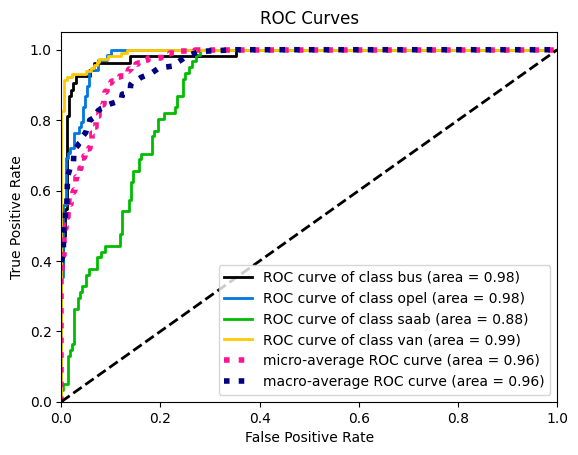

In [24]:
y_pred_PCA = clf_PCA.predict(X_test_PCA_scaled)
y_prob_PCA = clf_PCA.predict_proba(X_test_PCA_scaled)

print('Accuracy is {0}'.format(accuracy_score(list(y_test), list(y_pred_PCA))))
print('Recall is {0}'.format(recall_score(list(y_test), list(y_pred_PCA), labels=list(tags_unique), average = None).mean()))
print('Precision is {0}'.format(precision_score(list(y_test), list(y_pred_PCA), labels=list(tags_unique), average = None).mean()))
print('F1_score is {0}'.format(f1_score(list(y_test), list(y_pred_PCA), labels=list(tags_unique), average = None).mean()))

scikitplot.metrics.plot_roc(y_pred_PCA, y_prob_PCA)

По метрикам и графику мы видим, что качество классифкации сильно ухудшилось. Мое предположение в том, что нужно попробовать логистическую регрессию с другими параметрами, так оптимальные значения для данных с 19 фичами могут не быть оптимальными для данных после PCA

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [37]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':range(2, 20)}
model = DecisionTreeClassifier()
clf_tree = GridSearchCV(model, parameters)
clf_tree.fit(X_train_scaled, y_train)
clf_tree.best_params_

{'max_depth': 12}

In [40]:
y_pred_tree = clf_tree.best_estimator_.predict(X_test_scaled)
y_prob_tree = clf_tree.best_estimator_.predict_proba(X_test_scaled)

print('Accuracy of tree is {0}'.format(accuracy_score(list(y_test), list(y_pred_tree))))
print('Recall of tree is {0}'.format(recall_score(list(y_test), list(y_pred_tree), labels=list(tags_unique), average = None).mean()))
print('Precision of tree is {0}'.format(precision_score(list(y_test), list(y_pred_tree), labels=list(tags_unique), average = None).mean()))
print('F1_score of tree is {0}'.format(f1_score(list(y_test), list(y_pred_tree), labels=list(tags_unique), average = None).mean()))

print('F1_score per class is {0}'.format(f1_score(list(y_test), list(y_pred_tree), labels=list(tags_unique), average = None)))

Accuracy of tree is 0.67003367003367
Recall of tree is 0.6785977564102564
Precision of tree is 0.6920070061517429
F1_score of tree is 0.6838009934474741
F1_score per class is [0.83333333 0.5        0.4939759  0.90789474]


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

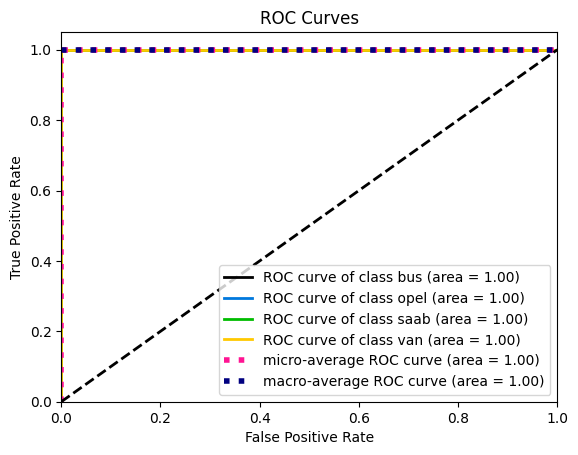

In [39]:
scikitplot.metrics.plot_roc(y_pred_tree, y_prob_tree)

Оптимальная глубина дерева на данном диапазоне параметра составила 12. Я пробовала вариаровать (2, 10) - оптимальная глубина получилась 9, (2, 30) - оптимальная глубина получилась 25. Попробовав ппотестировать на дереве с разной глубиной тестовые данные, результат +- одинаковый, для глубины 12 чуть лучше остальных, поэтому оставила его.

Мы видим, что одно дерево работает немного хуже логистической регрессии, при этом тенденция со сложностями на 2 и 3 классе сохраняется. Классификаитора путают их между собой, не имея существенных проблем с выделением объектов 1 и 4 класса.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

Будем копить значения метрик acc и f1 для ансамблей 2 типов - логистическая регрессия и деревья в завасимости от числа классификаторов в ансамбле

In [47]:
f1_tree = []
acc_tree = []
f1_LR = []
acc_LR = []

In [ ]:
from sklearn.ensemble import BaggingClassifier
for N in range (2, 100, 5):
  clf_tree_ensamble = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth=12), n_estimators=N,
                        max_samples=X_train.shape[0], max_features=X_train.shape[1])
  clf_tree_ensamble.fit(X_train_scaled, y_train)
  pred_tree_ensamble = clf_tree_ensamble.predict(X_test_scaled)

  acc_tree.append(accuracy_score(pred_tree_ensamble,y_test))
  f1_tree.append(f1_score(pred_tree_ensamble,y_test,average='macro'))
  clf_LR_ensamble = BaggingClassifier(estimator = LogisticRegression(max_iter=500,
                                      tol = 1e-3, solver = 'saga', C = 0.4),
                                      n_estimators=N,
                                      max_samples=X_train.shape[0],\
                                      max_features=X_train.shape[1])
  clf_LR_ensamble.fit(X_train_scaled, y_train)
  pred_LR_ensamble = clf_LR_ensamble.predict(X_test_scaled)

  acc_LR.append(accuracy_score(pred_LR_ensamble,y_test))
  f1_LR.append(f1_score(pred_LR_ensamble,y_test,average='macro'))

Text(0.5, 1.0, 'Показатели ансамбля в зависмости от количества деревьев')

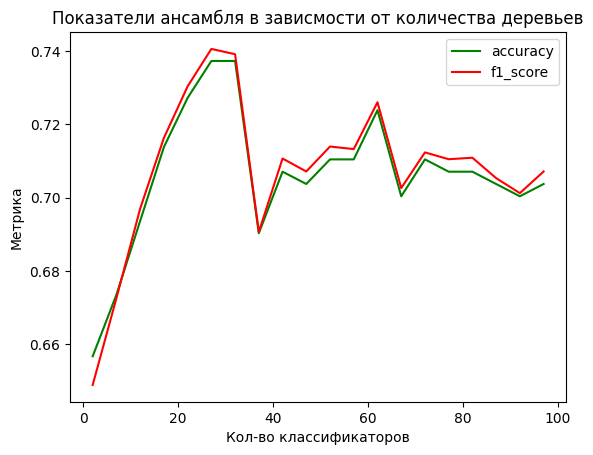

In [49]:
plt.plot(range (2, 100, 5), acc_tree, color='Green')
plt.plot(range (2, 100, 5), f1_tree, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Кол-во классификаторов')
plt.ylabel('Метрика')
plt.title('Показатели ансамбля в зависмости от количества деревьев')

Text(0.5, 1.0, 'Показатели ансамбля в зависмости от количества классификторов Logistic Regression')

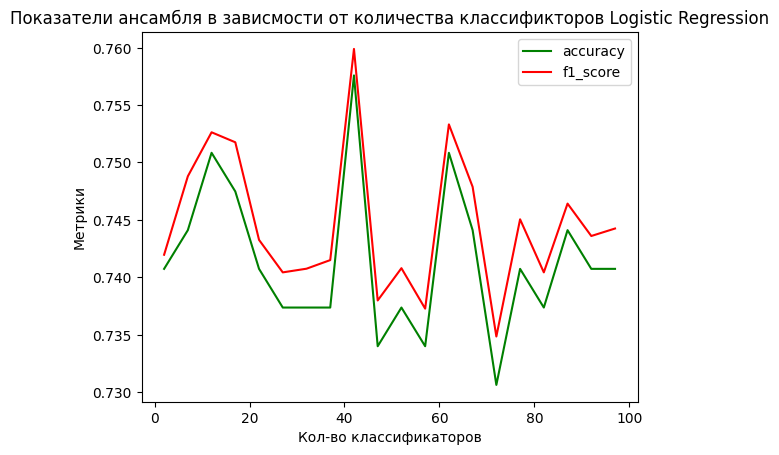

In [50]:
plt.plot(range(2,100,5), acc_LR, color='Green')
plt.plot(range(2,100,5), f1_LR, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Кол-во классификаторов')
plt.ylabel('Метрики')
plt.title('Показатели ансамбля в зависмости от количества классификторов Logistic Regression')

Во первых, можно сказать, что acc и f1 ведут себя схожим образом в зависимости от количества классификаиоров в ансамбле.
Во-вторых, видим, что характер кривых и оптимальные значения классификаиторов отличаются для разных типов.
Для ансамбля из деревьев наблюдается рост показателей качества при увеличении классификаиоров от 2 до 30, далее идет небольшой спад в раках 5%. Для ансамбля из деревев лучше выбрать 30 классификаторов.
Для ансамбля из логистической регрессии результаты скачут, предлагаю просто взять максимум получившегося графика на уровне 40 класиификаторов

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [51]:
from sklearn.ensemble import RandomForestClassifier
acc_RF = []
f1_RF = []
# YOUR CODE HERE
for N in range (2, 100, 5):
  clf_RF = RandomForestClassifier(n_estimators=N, max_samples=X_train.shape[0], max_features=X_train.shape[1])
  clf_RF.fit(X_train_scaled, y_train)
  pred_RF = clf_RF.predict(X_test_scaled)

  acc_RF.append(accuracy_score(pred_RF,y_test))
  f1_RF.append(f1_score(pred_RF,y_test,average='macro'))


Text(0.5, 1.0, 'Показатели ансамбля в зависмости от количества деревьев в лесу')

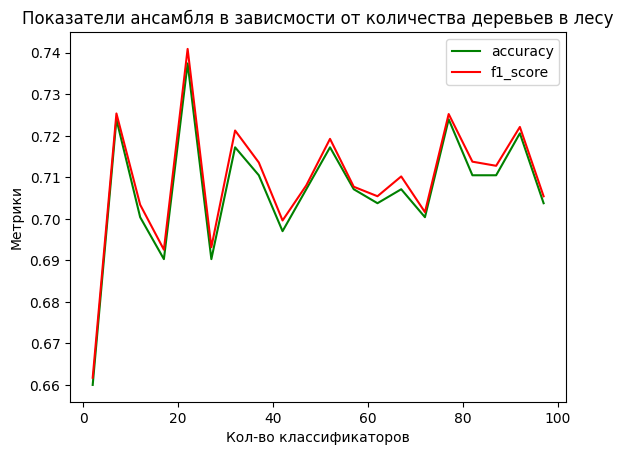

In [52]:
plt.plot(range(2,100,5), acc_RF, color='Green')
plt.plot(range(2,100,5), f1_RF, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Кол-во классификаторов')
plt.ylabel('Метрики')
plt.title('Показатели ансамбля в зависмости от количества деревьев в лесу')

Результаты случайного леса тоже скачут в зависимости от числа деревьев, предлагаю взять 25 классификаторов в лесу.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

F1 и ACC в зависимости от размера выборки
0.1  [0.08823529 0.10526316 0.38095238 0.2173913 ]
0.2  [0.06557377 0.19161677 0.39520958 0.15942029]
0.3  [0.07874016 0.25773196 0.31446541 0.14035088]
0.4  [0.09375    0.28865979 0.14705882 0.13235294]
0.5  [0.11347518 0.27807487 0.25531915 0.128     ]
0.6  [0.17948718 0.26519337 0.26950355 0.12068966]
0.7  [0.24137931 0.15068493 0.25454545 0.09174312]
0.8  [0.24444444 0.13043478 0.24836601 0.16260163]
0.9  [0.25945946 0.11764706 0.23287671 0.12598425]
1.0  [0.26347305 0.20588235 0.20731707 0.11023622]


Text(0.5, 1.0, 'Зависимость качества Logistic Regression от размера выборки')

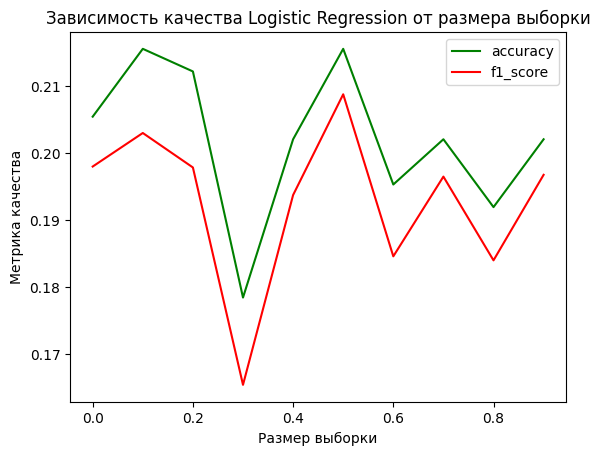

In [71]:
# YOUR CODE HERE
from sklearn.utils import shuffle

N = 10
part = 54
arr_acc = []
arr_f1 = []

#X_train, y_train = shuffle(X_train_scaled, y_train)

print('F1 и ACC в зависимости от размера выборки')

for i in range(N):

    clf = LogisticRegression(max_iter=500, tol = 1e-3, solver = 'saga', C = 10)
    clf.fit(X_train_scaled[:part*(i+1)], y_train[:part*(i+1)])
    bg_pred = clf.predict(X_test_scaled)

    arr_acc.append(accuracy_score(bg_pred,y_test))
    arr_f1.append(f1_score(bg_pred,y_test,average='macro'))
    print('{:.1f}  {}'.format((i+1)*0.1,f1_score(bg_pred,y_test,average=None)))

plt.plot([0.1*i for i in range(N)], arr_acc, color='Green')
plt.plot([0.1*i for i in range(N)], arr_f1, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Размер выборки')
plt.ylabel('Метрика качества')
plt.title('Зависимость качества Logistic Regression от размера выборки')

Text(0.5, 1.0, 'Зависимость качества Decision Tree от размера выборки')

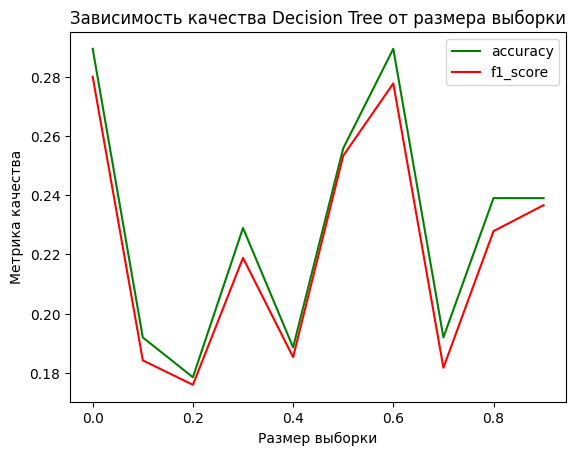

In [68]:
N = 10
part = 54
arr_acc = []
arr_f1 = []

#X_train, y_train = shuffle(X_train_scaled, y_train)

for i in range(N):

    clf = DecisionTreeClassifier(max_depth=12)
    clf.fit(X_train_scaled[:part*(i+1)], y_train[:part*(i+1)])
    bg_pred = clf.predict(X_test_scaled)

    arr_acc.append(accuracy_score(bg_pred,y_test))
    arr_f1.append(f1_score(bg_pred,y_test,average='macro'))

plt.plot([0.1*i for i in range(N)], arr_acc, color='Green')
plt.plot([0.1*i for i in range(N)], arr_f1, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Размер выборки')
plt.ylabel('Метрика качества')
plt.title('Зависимость качества Decision Tree от размера выборки')

Text(0.5, 1.0, 'Зависимость качества Random Forest от размера выборки')

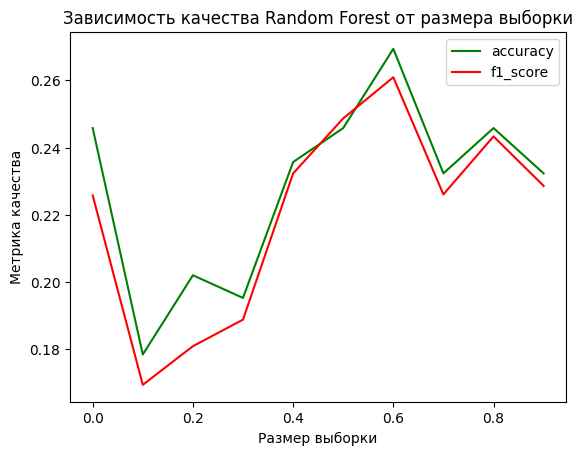

In [67]:
N = 10
part = 54
arr_acc = []
arr_f1 = []

#X_train, y_train = shuffle(X_train_scaled, y_train)

for i in range(N):

    clf = RandomForestClassifier(n_estimators = 20, max_samples=X_train[:part*(i+1)].shape[0], max_features=X_train.shape[1])
    clf.fit(X_train_scaled[:part*(i+1)], y_train[:part*(i+1)])
    pred = clf.predict(X_test_scaled)

    arr_acc.append(accuracy_score(pred,y_test))
    arr_f1.append(f1_score(bg_pred,y_test,average='macro'))

plt.plot([0.1*i for i in range(N)], arr_acc, color='Green')
plt.plot([0.1*i for i in range(N)], arr_f1, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Размер выборки')
plt.ylabel('Метрика качества')
plt.title('Зависимость качества Random Forest от размера выборки')

При исследовании влияния размера выборки на качество классификаторов разных типов получены такие результаты, что при использовании 2/3 данных уже достигаются максимальные показатели качества модели, поэтому для данного количества классов количество данных даже немного избыточное

ОБЩИЕ ВЫВОДЫ:

В лабораторной работе мы попробовали деревянные модели, а также ансамбли для задачи классификации.
Максимальные показатели точности следующие:

1) Логистичекая регрессия 78%

2) Одно дерево 67%

3) Ансамбль из деревьев 74%

4) Ансамбль из логистической регрессии 76%

5) Случайный лес 76%

Полученные результаты говорят о том, что для деревьев хорошим решением будет строить ансамбли, этот подход существенно поднимает качество относительно одного дерева. Лучше всех среди деревянных решений отработал лес.

При этом абсолютные показатели на отложенной выборке выше у логистической регрессии (видимо, это связано с характером данных, в частности, со сложностью разделения 2 и 3 класса).
Интересным результатом лабораторной было то, что совмещение логистических регрессий в ансамбль не дает прироста, по этому вычислительные затраты на составление ансамбля становятся нецелесообразными.
